##  Regression based on Boston house price data

In [ ]:
# from sklearn.datasets import load_boston

# boston = load_boston() 

# import pandas as pd
# import numpy as np

# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]

In [2]:
# from sklearn.datasets import fetch_california_housing
# housing = fetch_california_housing()


In [ ]:
# print(housing)

In [10]:
# import pandas as pd
# import numpy as np

# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [ ]:
# from sklearn.datasets import load_boston

# boston = load_boston() 

# import json
# from numpyencoder import NumpyEncoder
# # create json object from dictionary
# json = json.dumps(boston,cls=NumpyEncoder, sort_keys=True, indent=4)

# # open file for writing, "w" 
# f = open("boston_house.json","w")

# # write json object to file
# f.write(json)

# # close file
# f.close()


In [ ]:
##  Due to depreciate, save boston housing data in file, 
## later can load from file intead of from datasets or url

### start here

In [1]:
import json
with open("boston_house.json", 'r') as openfile:
    boston = json.load(openfile)
    
print(type(boston))

<class 'dict'>


In [ ]:
# print(boston)

In [15]:
import pandas as pd
df = pd.DataFrame(boston['data'], columns=boston['feature_names']) 
df['PRICE'] = boston['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
###
#### Attribute Information (in order):
#### - CRIM     per capita crime rate by town
#### - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#### - INDUS    proportion of non-retail business acres per town
#### - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#### - NOX      nitric oxides concentration (parts per 10 million)
#### - RM       average number of rooms per dwelling
#### - AGE      proportion of owner-occupied units built prior to 1940
#### - DIS      weighted distances to five Boston employment centres
#### - RAD      index of accessibility to radial highways
#### - TAX      full-value property-tax rate per $10,000
#### - PTRATIO  pupil-teacher ratio by town
#### - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#### - LSTAT    % lower status of the population

In [18]:
print(df.shape)
print(df.columns)

(506, 14)
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline 


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

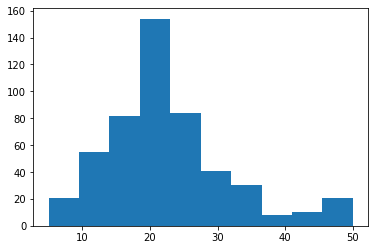

In [33]:
plt.hist(boston['target'])

In [34]:
df.PRICE.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

In [28]:
df.groupby( ['CHAS'] )['PRICE'].count()

CHAS
0.0    471
1.0     35
Name: PRICE, dtype: int64

In [29]:
df['PTRATIO'].mean()

18.455533596837967

###  Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings

<AxesSubplot:>

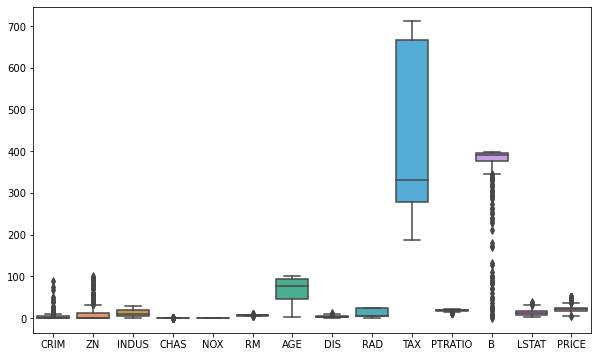

In [35]:

import seaborn as sns

f, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df)

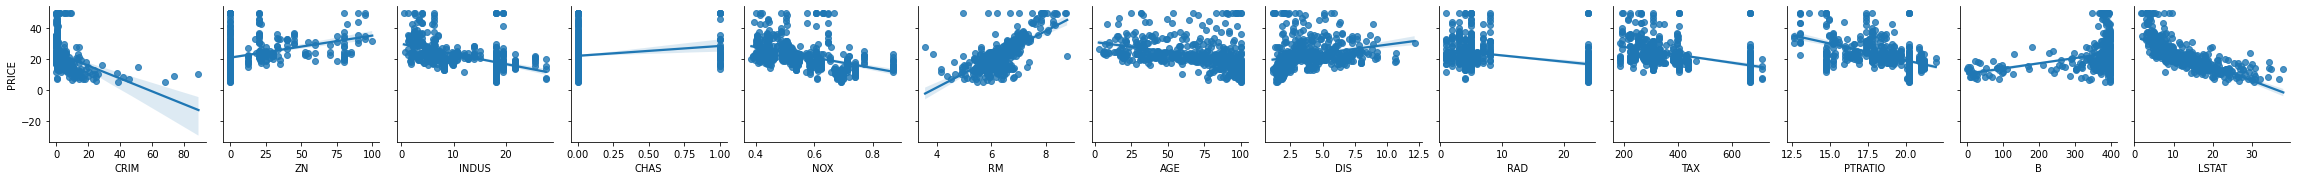

In [37]:
sns.pairplot(df, x_vars=boston['feature_names'], y_vars=['PRICE'], kind='reg')

## Training & evaluation, Try different Regression models

In [38]:
# Split the dataset (train_test_split)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'], test_size=0.2, random_state=1)


In [ ]:
## Try different Regression models


In [39]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import collections, operator
RunResult = collections.namedtuple('RunResult', 'model error pred r2')

# try some well-known regression algorithms
model_list = [
             LinearRegression(), 
             KNeighborsRegressor(),
             DecisionTreeRegressor(), 
             RandomForestRegressor(n_estimators=100),
            ]

                                        RMSE    R-squared
 1. RandomForestRegressor               2.95    0.91
 2. DecisionTreeRegressor               4.27    0.82
 3. LinearRegression                    4.84    0.76
 4. KNeighborsRegressor                 6.74    0.54


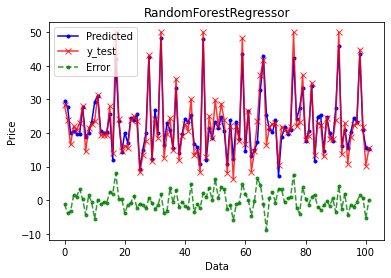

In [40]:
result_list = []

for model in model_list:
    model.fit(X_train, y_train) # train using training set
    pred = model.predict(X_test) # evaluate the performance using test set
    mse = mean_squared_error(y_test, pred) # compute MSE
    r2 = r2_score(y_test, pred) # r2 score (r-square score, max 1, can be -ve)
    rmse = np.sqrt(mse)
    result_list.append(RunResult(model, rmse, pred, r2))
    
# sort the results by error and then print the result
result_list.sort(key=operator.attrgetter('error'))

space=' '
print(f'{space*40}RMSE{space*4}R-squared')
for i, result in enumerate(result_list):
    print(f'{i+1:2}. {type(result.model).__name__:30}    {result.error:6.2f}    {result.r2:.2f}')

best_model = result_list[0].model
lowest_error = result_list[0].error
best_pred = result_list[0].pred

# performance of the best model
x_index = np.arange(0, pred.shape[0])
dist = y_test - best_pred # compute distance between actual pt and predicted pt

plt.plot(x_index, pred,  marker='.', alpha=1, color='b', label='Predicted')
plt.plot(x_index, y_test, marker='x', alpha=0.8, color='r', label='y_test')
plt.plot(x_index, dist, marker='.', alpha=0.8, linestyle='--', color='g', label='Error')
plt.title(f'{type(best_model).__name__}' )
plt.ylabel('Price')
plt.xlabel('Data')
plt.legend()

### Cross-validated RMSE

In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5) # Warning: cv have to run 5 times!

rmse_cv = np.sqrt(-scores) # For sklearn, the higher the score, the better the performance. Error is the opposite, so the score is negative.
print(f'RMSE scores: {rmse_cv}')
print(f'RMSE mean: {rmse_cv.mean():.2f}')
print(f'RMSE std: {rmse_cv.std():.2f}')

RMSE scores: [3.18627024 3.41070411 2.99898925 3.08634039 3.14686577]
RMSE mean: 3.17
RMSE std: 0.14


In [42]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
cv_results = cross_validate(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
#     print(len(cv_results))
print(cv_results.keys())
print('Fit time:' + str(cv_results['fit_time']))  # fit time of each split 
print('Score time:' + str(cv_results['score_time'])) # score time of each split
rmse_cv = np.sqrt(-cv_results['test_score'])
print('Test score:' + str(rmse_cv))

dict_keys(['fit_time', 'score_time', 'test_score'])
Fit time:[0.07159472 0.07048368 0.06294227 0.06742263 0.07745528]
Score time:[0.         0.00099754 0.         0.         0.        ]
Test score:[3.06682242 3.07243574 3.2034944  3.7368357  2.90349466]


###  predict

In [43]:
best_model = result_list[0].model

In [45]:
rows =[[0.02631, 0.0, 7.5, 0.0, 0.469, 6.421, 78.9, 4.99, 2.1, 242.0, 17.8, 396.90, 9.14]]

unseen_pred = best_model.predict(rows)
print(f'Predicted price: ${unseen_pred[0]:.2f} K')

Predicted price: $22.22 K


###  Data scaling

In [2]:
X = boston['data']
y = boston['target']

In [3]:
# StandardScaler for standardization
# MinMaxScaler for min-max normalization 
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
minMaxScaler = MinMaxScaler().fit(X)
X_processed = minMaxScaler.transform(X)

##  OR if you need standardization ( z=(x-u)/s, where u is mean, s is standard dev)
# X_processed = StandardScaler().fit_transform(X) 



In [5]:
# use pandas dataframe
import pandas as pd

df_processed = pd.DataFrame(X_processed, columns=boston['feature_names'])
df_processed

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071
